In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pyecharts.charts import Bar, Line
import pyecharts.options as opts

In [14]:
data = pd.read_csv('/Users/hukeer/Desktop/上海楼房.csv')
data = data[data['价格'].str.match('^[0-9]+$')]
quyu =  ['黄浦','杨浦','虹口','普陀','静安','浦东','闵行','松江','宝山','青浦','嘉定','奉贤','崇明','金山']
data = data[data['位置'].isin(quyu)]
data['价格'] = data['价格'].astype('float')
result = data.groupby(by='位置')['价格'].mean()
result.sort_values(ascending=False, inplace=True)
x = result.index
y = result.values

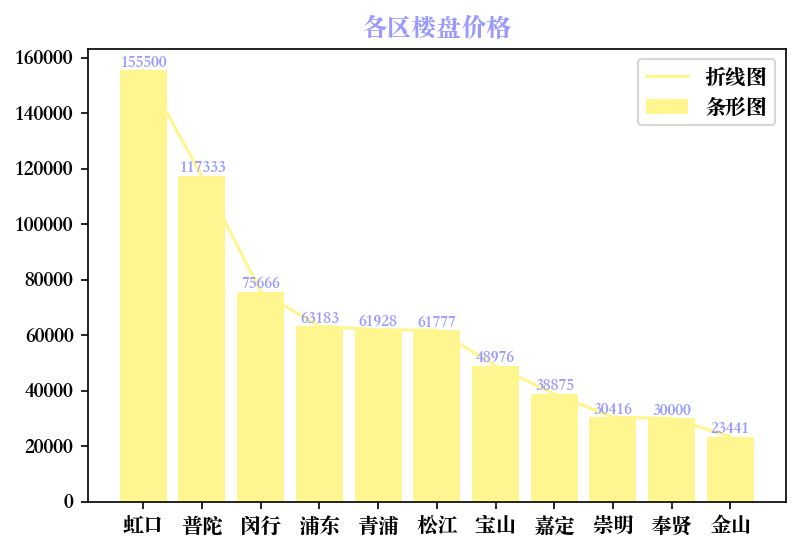

In [28]:
plt.rcParams['font.family'] = 'Songti SC' 
plt.figure(dpi=150)
plt.bar(x, y, color='#FFF68F')
plt.plot(x, y, color='#FFF68F')
plt.title('各区楼盘价格',c='#9999ff')
for i,j in zip(x, y):
    plt.text(i,j+1000, '%d'%j, ha='center', fontsize=8, c='#9999ff')
plt.legend(['折线图', '条形图'])
plt.show()

In [29]:
import matplotlib
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
a

['.Aqua Kana',
 '.Keyboard',
 '.New York',
 '.New York',
 '.SF Arabic',
 '.SF Compact',
 '.SF Compact',
 '.SF Compact Rounded',
 '.SF NS Mono',
 '.SF NS Mono',
 '.SF NS Rounded',
 'Academy Engraved LET',
 'Al Bayan',
 'Al Nile',
 'Al Tarikh',
 'American Typewriter',
 'Andale Mono',
 'Apple Braille',
 'Apple Braille',
 'Apple Braille',
 'Apple Braille',
 'Apple Braille',
 'Apple Chancery',
 'Apple SD Gothic Neo',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial Black',
 'Arial Hebrew',
 'Arial Narrow',
 'Arial Narrow',
 'Arial Narrow',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Arial Unicode MS',
 'Athelas',
 'Avenir',
 'Avenir Next',
 'Avenir Next Condensed',
 'Ayuthaya',
 'Baghdad',
 'Bangla MN',
 'Bangla Sangam MN',
 'Baskerville',
 'Beirut',
 'Big Caslon',
 'Bloody Impact',
 'Bodoni 72',
 'Bodoni 72 Oldstyle',
 'Bodoni 72 Smallcaps',
 'Bodoni Ornaments',
 'Bradley Hand',
 'Brush Script MT',
 'Chalkboard',
 'Cha

In [30]:
num = data['位置'].value_counts()
sortlist = list(x)
num_new = num[sortlist]
num_new

虹口     2
普陀     3
闵行     9
浦东    13
青浦     7
松江     9
宝山     6
嘉定     4
崇明     6
奉贤     3
金山    11
Name: 位置, dtype: int64

In [32]:
bar = (
    Bar()
    .add_xaxis(list(x))
    .add_yaxis('各区均价', list(y)) 
    .extend_axis(yaxis=opts.AxisOpts(name='楼盘数'))
)

line = (
    Line()
    .add_xaxis(list(x))
    .add_yaxis('楼盘数', list(num_new), yaxis_index=1, z=2)    
)
bar.overlap(line).render_notebook()

In [33]:
from pyecharts.charts import Map
a, b = (y.min(), y.max())
map=(
    Map(init_opts=opts.InitOpts(width='1000px', height='800px'))
    .add('房价均价', [(i+'区',j) for i, j in zip(x, list(y))], '上海',)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="上海各地区楼盘均价",subtitle='2021年12月'),
        visualmap_opts=opts.VisualMapOpts(min_=int(a),max_=int(b))
    )
)
map.render_notebook()

In [34]:
from pyecharts.charts import Geo
from pyecharts.commons.utils import JsCode

a, b = (y.min(), y.max())
geo=(
    Geo(init_opts=opts.InitOpts(width='1000px', height='800px'))
    .add_schema('上海',itemstyle_opts=opts.ItemStyleOpts(color='#323c48', border_color='#ffffff'))
    .add('房价均价', [(i+'区',j) for i, j in zip(x, list(y.round(1)))],
        label_opts=opts.LabelOpts(formatter=JsCode(
                """function(params){
                if ('value' in params.data){
                return params.data.name + ':' +params.data.value[2];
                }
            }"""            )
            )
        )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="上海各地区楼盘均价",subtitle='2021年12月'),
        visualmap_opts=opts.VisualMapOpts(min_=int(a),max_=int(b))
    )
)
geo.render_notebook()

In [3]:
import requests
import time
import random
from lxml import etree
head = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.4 Safari/605.1.15'}
name_list = []
star_list = []
time_list = []
like_list = []
text_list = []
for i in range(0,200,20):
    print(f'正在爬取第{i//20+1}页')
    url = 'https://movie.douban.com/subject/1889243/comments?start={0}&limit=20&status=P&sort=new_score'.format(i)
    res = requests.get(url,headers=head)
    print(res)
    dom = etree.HTML(res.text)
    name = dom.xpath ( '//div[@class = "comment"]/h3/span[@class = "comment-info"]/a/text()')
    star = dom.xpath( '//div[@class = "comment"]/h3/span[@class = "comment-info"]/span[2]/@title' )
    time_ = dom.xpath ( '//div[@class = "comment"]/h3/span[@class = "comment-info"]/span[@class="comment-time "]/text()' )
    like = dom.xpath ( '//div[@class = "comment"]/h3/span[@class = "comment-vote"]/span[@class = "votes vote-count"]/text()' )
    txt = dom.xpath ( '//p[@class = " comment-content"]/span' )
    txt = [j.text for j in txt]
    name_list.extend (name)
    for rating in star:
        if str(rating) in ['力荐','推荐','还行','较差','很差']:
            star_list.append(str(rating))
        else:
            star_list.append('Null')
    time_list.extend (time_)
    like_list.extend (like)
    text_list.extend(txt)
    time.sleep(random.randint(40,60))
    print ( f'已经完成第{i//20+1}页爬取' )
    print(len(name_list))
    print(len(star_list))
    print(len(time_list))
    print(len(like_list))
    print(len(text_list)) 
    
import pandas as pd
dic = {'Name' : name_list,
       'Star' : star_list,
       'Time' : time_list,
       'Like' : like_list,
       'Review' : text_list
    }
df = pd.DataFrame.from_dict(dic,orient='index').T
df.to_csv("/Users/hukeer/Desktop/星际穿越影评.csv",encoding='utf-8')

正在爬取第1页
<Response [200]>
已经完成第1页爬取
20
20
20
20
20
正在爬取第2页
<Response [200]>
已经完成第2页爬取
40
40
40
40
40
正在爬取第3页
<Response [200]>
已经完成第3页爬取
60
60
60
60
60
正在爬取第4页
<Response [200]>
已经完成第4页爬取
80
80
80
80
80
正在爬取第5页
<Response [200]>
已经完成第5页爬取
100
100
100
100
100
正在爬取第6页
<Response [200]>
已经完成第6页爬取
120
120
120
120
120
正在爬取第7页
<Response [200]>
已经完成第7页爬取
140
140
140
140
140
正在爬取第8页
<Response [200]>
已经完成第8页爬取
140
140
140
140
140
正在爬取第9页
<Response [200]>
已经完成第9页爬取
160
160
160
160
160
正在爬取第10页
<Response [200]>
已经完成第10页爬取
180
180
180
180
180


In [2]:
print(len(name_list))
print(len(star_list))
print(len(time_list))
print(len(like_list))
print(len(text_list)) 

180
180
180
180
180


In [1]:
import requests
import time
import random
import pandas as pd
from lxml import etree
# head = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)'
#         'AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3'
#         'Safari/605.1.15'}
head = {
    'Content-Type': 'text/html; charset=utf-8',
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)''AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3''Safari/605.1.15',
    'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
#     'Accept-Encoding':'gzip, deflate, br',
    'Accept-Language': 'zh-CN,zh-Hans;q=0.9',
    'Cache-Control': 'must-revalidate, no-cache, private',
    'Connection': 'keep-alive',
    'Host': 'movie.douban.com',
    'Cookie':'__utma=30149280.183796112.1653286052.1653315892.1653317735.6; __utmb=30149280.0.10.1653317735; __utmc=30149280; __utmv=30149280.25349; __utmz=30149280.1653286052.1.1.utmcsr=search.douban.com|utmccn=(referral)|utmcmd=referral|utmcct=/movie/subject_search; push_doumail_num=0; push_noty_num=0; __utma=223695111.693229332.1653286052.1653315892.1653317735.6; __utmb=223695111.0.10.1653317735; __utmc=223695111; __utmz=223695111.1653286052.1.1.utmcsr=search.douban.com|utmccn=(referral)|utmcmd=referral|utmcct=/movie/subject_search; _pk_id.100001.4cf6=ce9de800d8df86ed.1653285977.6.1653317746.1653315896.; _pk_ses.100001.4cf6=*; ap_v=0,6.0; _pk_ref.100001.4cf6=%5B%22%22%2C%22%22%2C1653317735%2C%22https%3A%2F%2Fbaidu.com%2F%22%5D; _vwo_uuid_v2=D6EC9C4BF327FCD9F097D5548B97F94F5|a7b30b1a2db2201bbe8fc70d06c08f82; __yadk_uid=sEABMS41D4oymZnnoBcmrH3Zqc9TSsnH; ck=QUYI; dbcl2="253498861:vo5XznNIC2k"; bid=mImVwX99J7Q; ll="118172"'
}
name_list = []
star_list = []
time_list = []
like_list = []
text_list = []
for i in range(0,10):
    print(f'正在爬取第{i+1}页')
    url = f'https://movie.douban.com/subject/25807345/comments?start={i*20}&limit=20&status=P&sort=new_score'
    res = requests.get(url,headers=head)
    dom = etree.HTML(res.text)
    print(res)
#     time.sleep(random.randint(10,20))
    name = dom.xpath ( '//div[@class = "comment"]/h3/span[@class = "comment-info"]/a/text()')
    star = dom.xpath( '//div[@class = "comment"]/h3/span[@class = "comment-info"]/span[2]/@title' )
    time_ = dom.xpath ( '//div[@class = "comment"]/h3/span[@class = "comment-info"]/span[@class="comment-time "]/text()' )
    like = dom.xpath ( '//div[@class = "comment"]/h3/span[@class = "comment-vote"]/span[@class = "votes vote-count"]/text()' )
    txt = dom.xpath ( '//p[@class = " comment-content"]/span' )
    txt = [j.text for j in txt]
    print(name)
    print(star)
    print(time_)
    print(like)
    print(txt)
    name_list.extend (name)
    for rating in star:
        if str(rating) in ['力荐','推荐','还行','较差','很差']:
            star_list.append(str(rating))
        else:
            star_list.append('Null')
    time_list.extend (time_)
    like_list.extend (like)
    text_list.extend(txt)
    print(len(name_list))
    print(len(star_list))
    print(len(time_list))
    print(len(like_list))
    print(len(text_list)) 
    time.sleep(random.randint(40,60))
    print ( f'已经完成第{i+1}页爬取' )

dic = {'Name' : name_list,
       'Star' : star_list,
       'Time' : time_list,
       'Like' : like_list,
       'Review' : text_list
    }
df = pd.DataFrame.from_dict(dic,orient='index').T
df.to_csv("/Users/hukeer/Desktop/彗星来的那一夜影评.csv",encoding='utf-8')

正在爬取第1页
<Response [200]>
['时间与星', '弗朗索瓦张。', '老晃', '黄青蕉', '文西', 'Jin', '樹一', '坍塌', '影志', '匡轶歌', 'zearq', '大島', '思路乐', 'sunwenhao90', '小岩井', '心生', '余小岛', 'Orange', '三', '朝暮雪']
['推荐', '力荐', '还行', '力荐', '推荐', '推荐', '推荐', '力荐', '推荐', '力荐', '2014-10-07 15:43:58', '还行', '力荐', '较差', '力荐', '推荐', '力荐', '力荐', '还行', '推荐']
['\n                    2014-09-25 16:36:41\n                ', '\n                    2014-09-12 04:16:22\n                ', '\n                    2014-09-21 02:22:50\n                ', '\n                    2014-12-15 00:55:59\n                ', '\n                    2014-09-10 12:29:19\n                ', '\n                    2015-02-20 17:56:47\n                ', '\n                    2015-07-22 20:54:01\n                ', '\n                    2014-09-12 04:34:47\n                ', '\n                    2014-11-02 23:13:57\n                ', '\n                    2014-11-04 16:51:18\n                ', '\n                    2014-10-07 15:43:58\n             

已经完成第3页爬取
正在爬取第4页
<Response [200]>
['䒳', '博仔', '国王KING', '小陪衬品', '内陆飞鱼', '断肠人在刷牙', 'phoebe', '说什么图灵', '左胸上的吸盘', '海棠', '刘康康', '汽车大师', '一贪', '爱吃面条', '菲氏葉猴', '岛上的夏奈', 'Boy kill boy', '刀叢中的小詩', '白眉道长', 'peterpan']
['推荐', '推荐', '力荐', '推荐', '推荐', '较差', '推荐', '较差', '还行', '力荐', '还行', '力荐', '力荐', '推荐', '力荐', '还行', '力荐', '力荐', '较差', '较差']
['\n                    2015-04-03 02:23:50\n                ', '\n                    2014-09-14 21:52:49\n                ', '\n                    2014-11-21 15:12:04\n                ', '\n                    2015-08-14 19:48:12\n                ', '\n                    2014-11-14 10:03:59\n                ', '\n                    2014-10-19 20:43:34\n                ', '\n                    2019-04-28 08:41:02\n                ', '\n                    2014-10-13 23:08:13\n                ', '\n                    2016-07-24 00:51:01\n                ', '\n                    2015-10-12 04:44:05\n                ', '\n                    2014-11-15 16:3

已经完成第8页爬取
正在爬取第9页
<Response [200]>
[]
[]
[]
[]
[]
120
120
120
120
120
已经完成第9页爬取
正在爬取第10页
<Response [200]>
[]
[]
[]
[]
[]
120
120
120
120
120
已经完成第10页爬取
